In [142]:
# pip install numpy

In [143]:
# pip install pandas

In [144]:
# pip install matplotlib

In [145]:
# pip install yfinance

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [147]:
start = '2012-01-01'
end = '2025-12-12'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\pragg\AppData\Local\Temp\ipykernel_20084\605818243.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [148]:
data.reset_index(inplace=True)

In [149]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449753,16.517490,16.127387,16.141480,147611217
1,2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2,2012-01-05,16.291536,16.414154,16.222811,16.368667,131808205
3,2012-01-06,16.069296,16.316013,16.063609,16.294999,108119746
4,2012-01-09,15.387977,15.994636,15.357569,15.982274,233776981
...,...,...,...,...,...,...
3502,2025-12-05,321.879974,323.618830,319.771365,319.791341,15719900
3503,2025-12-08,314.450012,321.230011,311.910004,321.029999,22006900
3504,2025-12-09,317.750000,318.709015,312.619995,313.100006,14151300


In [150]:
ma_100_days = data.Close.rolling(100).mean()

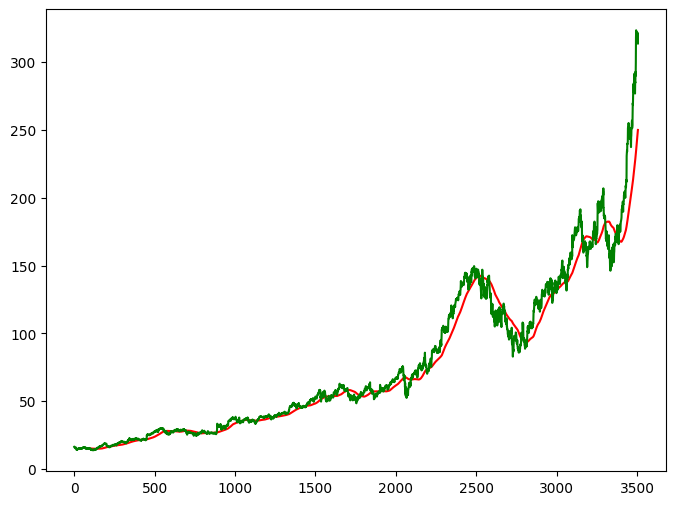

In [151]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [152]:
ma_200_days = data.Close.rolling(200).mean()

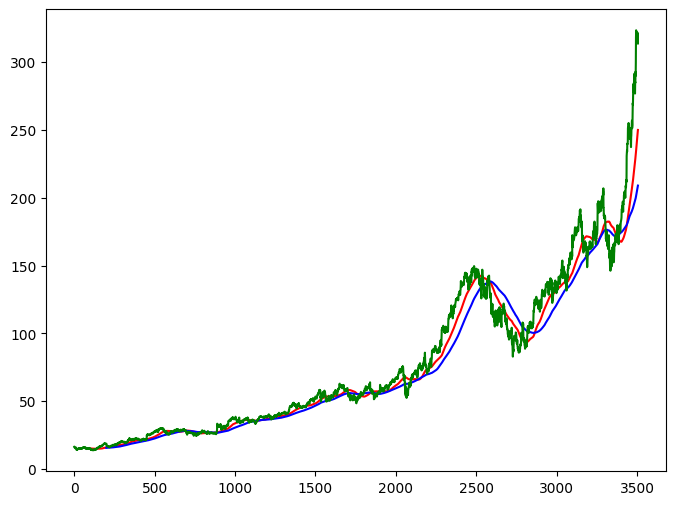

In [153]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [154]:
data.dropna(inplace=True)

In [155]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [156]:
data_train.shape[0]

2805

In [157]:
data_test.shape[0]

702

In [158]:
# pip install scikit_learn

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [160]:
data_train_scale = scaler.fit_transform(data_train)

In [161]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [162]:
x, y = np.array(x), np.array(y)

In [163]:
# pip install keras

In [164]:
# pip install tensorflow 

In [165]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

NameError: name 'LSTM' is not defined

In [167]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [168]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - loss: 0.0229
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - loss: 0.0062
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - loss: 0.0053
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - loss: 0.0045
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - loss: 0.0038
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - loss: 0.0039
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - loss: 0.0037
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - loss: 0.0035
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - loss: 0.0035
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - loss: 0.0037
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - loss: 0.0036
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - loss: 0.0031
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.0030
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 181ms/step - loss: 0.0033
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [169]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [170]:
pas_100_days = data_train.tail(100)

In [171]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [172]:
data_test_scale  =  scaler.fit_transform(data_test)

In [173]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [174]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step


In [175]:
scale =1/scaler.scale_

In [176]:
y_predict = y_predict*scale

In [177]:
y = y*scale

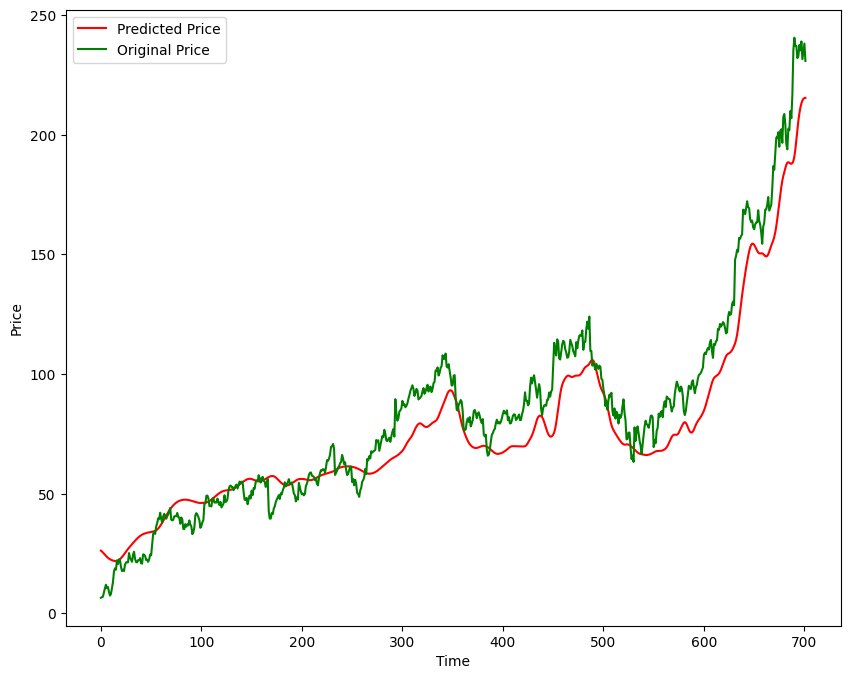

In [178]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
model.save('Stock Predictions Model.keras')

C:\Users\vtani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import sklearn

print("Python:", tf.__version__)
print("Environment ready for GRU/LSTM project")


C:\Users\vtani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Python: 2.20.0
Environment ready for GRU/LSTM project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

In [3]:
# -----------------------------
# 1️⃣ Download stock data (same as LSTM)
# -----------------------------
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

In [4]:
data = yf.download(stock, start, end)
data.reset_index(inplace=True)


C:\Users\vtani\AppData\Local\Temp\ipykernel_4952\2394152011.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
# Optional: Moving averages for visualization
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

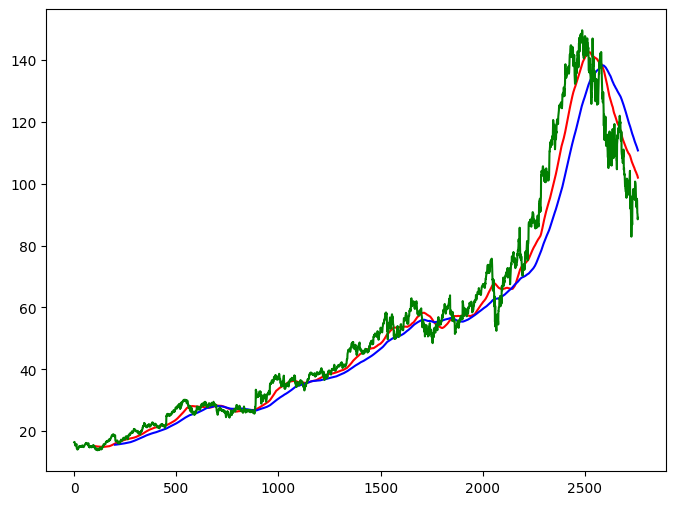

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close,'g')
plt.show()


In [7]:
# -----------------------------
# 2️⃣ Prepare training and test sets
# -----------------------------
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [8]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)


In [9]:
# Create sequences for GRU
x_train = []
y_train = []
for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# -----------------------------
# 3️⃣ Build GRU Model
# -----------------------------
model_gru = Sequential()
model_gru.add(GRU(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model_gru.add(Dropout(0.2))

C:\Users\vtani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model_gru.add(GRU(units=60, activation='relu', return_sequences=True))
model_gru.add(Dropout(0.3))


In [12]:
model_gru.add(GRU(units=80, activation='relu', return_sequences=True))
model_gru.add(Dropout(0.4))

In [13]:
model_gru.add(GRU(units=120))
model_gru.add(Dropout(0.5))


In [14]:
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# -----------------------------
# 4️⃣ Train GRU model
# -----------------------------
model_gru.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 386ms/step - loss: 0.0251
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 383ms/step - loss: 0.0046
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 358ms/step - loss: 0.0045
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 387ms/step - loss: 0.0040
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 359ms/step - loss: 0.0030
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - loss: 0.0031
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 266ms/step - loss: 0.0032
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 344ms/step - loss: 0.0031
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 366ms/step - loss: 0.0030
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 372ms/step - loss: 0.0027
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 354ms/step - loss: 0.0027
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 349ms/step - loss: 0.0032
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 356ms/step - loss: 0.0026
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - loss: 0.0024
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [16]:
# Show model summary
model_gru.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 100, 50)             │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 100, 60)             │          20,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 100, 80)             │          34,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 120)                 │          72,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,095 (1.55 MB)

 Trainable params: 135,031 (527.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 270,064 (1.03 MB)

In [17]:
# -----------------------------
# 5️⃣ Prepare test data
# -----------------------------
past_100_days = data_train.tail(100)
data_test_full = pd.concat([past_100_days, data_test], ignore_index=True)
data_test_scale = scaler.fit_transform(data_test_full)

In [18]:
x_test = []
y_test = []
for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [19]:
# -----------------------------
# 6️⃣ Predict and visualize
# -----------------------------
y_pred = model_gru.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step


In [20]:
# Inverse scaling
scale = 1/scaler.scale_
y_pred = y_pred*scale
y_test_actual = np.array(y_test)*scale

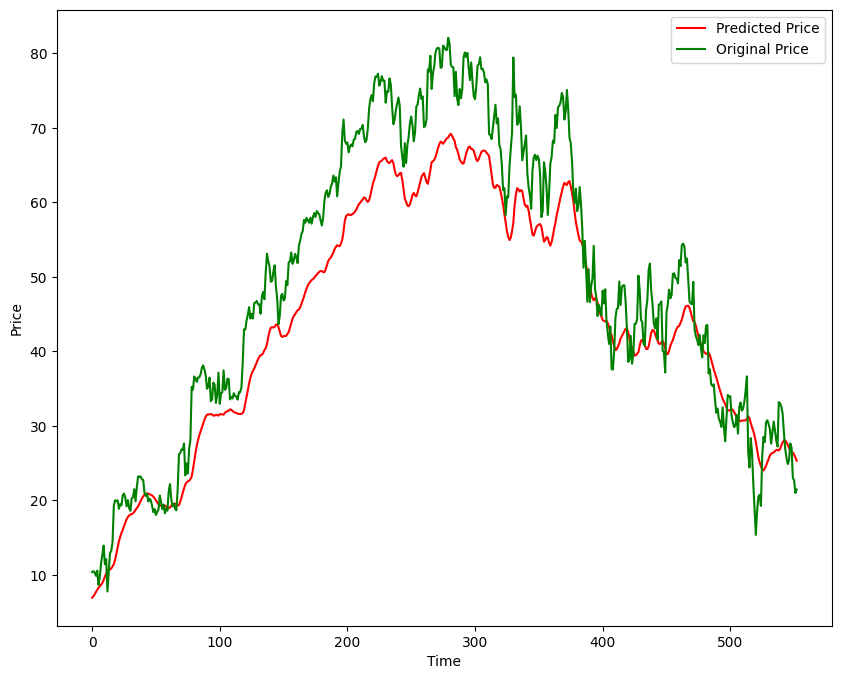

In [21]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, 'r', label='Predicted Price')
plt.plot(y_test_actual, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
# -----------------------------
# 7️⃣ Save the GRU model
# -----------------------------
model_gru.save('GRU_Model.keras')